#Pemodelan Reaktor NANI dengan Reaksi Reversible

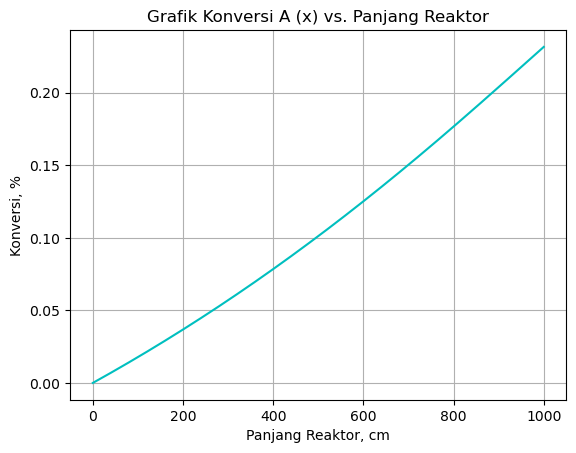

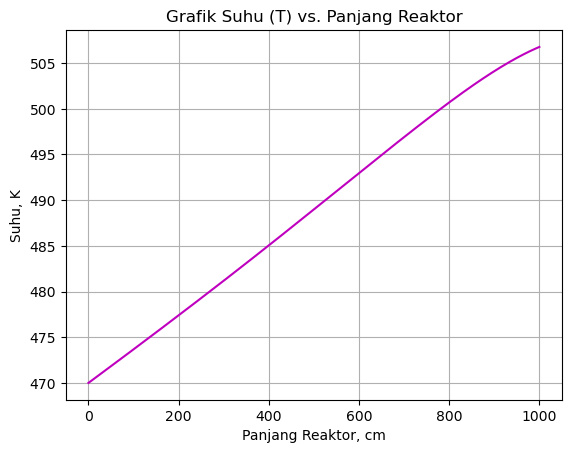

In [32]:
#Nama : Liska Dewi Muktiarani
#NIM  : 21/477837/TK/52633

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp as sol

#Data Perhitungan
U   =0.0085 #cal/(cm2.s.K)
F0  =10 #mol/s
x0  =0 
P   =7 #atm
D   =35 #cm
L   =1000 #cm
Cpa =20 #cal/mol/K
Cpb =10 #cal/mol/K
Cpc =15 #cal/mol/K
Cpi =10 #cal/mol/K
dHr =-35000 #cal/mol
R   =82 #cm3atm/mol/K
A   =10000 #s-1
E_R =6500 #K
alfa=-12.3
beta=4400 #K
Tref=273 #K
T0  =470 #K
Tp  =421 #K

IC=[x0,T0]
zbound=[0,L]
n=201
zspan=np.linspace(0,L,n)

def ODE(z,IC):
    x=IC[0]
    T=IC[1]
    Fa = 0.9*F0*(1-x)
    Fb = 0.9*F0*x
    Fc = 0.9*F0*x
    Fi = 0.1*F0
    Ft = Fa+Fb+Fc+Fi
    Ca = Fa/Ft*P/(R*T)
    Cb = Fb/Ft*P/(R*T)
    Cc = Fc/Ft*P/(R*T)
    K=np.exp(alfa+beta/T)
    k=A*np.exp(-E_R/T)
    minra=k*(Ca-(Cb*Cc)/K)
    dHR=dHr+(Cpb+Cpc-Cpa)*(T-Tref)
    dxdz=np.pi*D**2*minra/(3.6*F0)
    dTdz = ((-U*np.pi*D*(T-Tp))+(-dHR)*0.9*F0*dxdz)/(Fa*Cpa+Fb*Cpb+Fc*Cpc+Fi*Cpi)
    dCdz = [dxdz,dTdz]
    return dCdz

solver = sol(ODE,zbound,IC,t_eval=zspan)

#Plotting
plt.figure(0)
plt.plot(zspan,solver.y[0],'-c')
plt.grid()
plt.title('Grafik Konversi A (x) vs. Panjang Reaktor')
plt.xlabel('Panjang Reaktor, cm')
plt.ylabel('Konversi, %')
plt.show()

plt.figure(1)
plt.plot(zspan,solver.y[1],'-m')
plt.grid()
plt.title('Grafik Suhu (T) vs. Panjang Reaktor')
plt.xlabel('Panjang Reaktor, cm')
plt.ylabel('Suhu, K')
plt.show()

##Hasil dan Pembahasan

Berdasarkan skema grafik pertama diperoleh hubungan antara konversi komponen A terhadap panjang reaktor. Plot menunjukkan tren positif yang berarti terjadi kenaikan konversi komponen A seiring bertambahnya posisi pada reaktor. Semakin jauh posisi dari titik masuk (z = 0), maka konversi A semakin tinggi.

Berdasarkan skema grafik kedua diperoleh hubungan antara suhu gas terhadap panjang reaktor. Plot menunjukkan tren positif yang artinya terjadi kenaikan suhu gas seiring dengan bertambahnya posisi dari titik awal gas masuk (z = 0) pada reaktor. Hal ini disebabkan reaksi reversible yang terjadi bersifat eksotermis (menghasilkan panas) sehingga seiring bertambahnya posisi pada reaktor, yang artinya semakin tinggi jumlah A yang terkonversi sebagai produk, suhu juga akan semakin meningkat. Hal ini juga sesuai dengan data pada soal yang mana perubahan entalpi reaksi (dHr) pada kasus bernilai negatif sehingga reaksi bersifat eksotermis.  

Hasil konversi A dan persebaran suhu terhadap posisi reaktor dapat dilihat pada tabel berikut:

_______________________________________________________________
|Panjang Reaktor (z), cm | Konversi A (x), % |   Suhu (T), K   |
_______________________________________________________________
|         0.00           |       0.00        |     470.00      |
|         33.33          |       0.58        |     471.22      |
|         66.67          |       1.17        |     472.44      |
|        100.00          |       1.78        |     473.67      |
|        133.33          |       2.40        |     474.91      |
|        166.67          |       3.03        |     476.15      |
|        200.00          |       3.68        |     477.40      |
|        233.33          |       4.34        |     478.65      |
|        266.67          |       5.01        |     479.91      |
|        300.00          |       5.70        |     481.19      |
|        333.33          |       6.40        |     482.47      |
|        366.67          |       7.12        |     483.75      |
|        400.00          | 

Text(0.5, 1.0, 'Grafik Jumlah Mol Tiap Komponen, mol vs. Panjang Reaktor, cm')

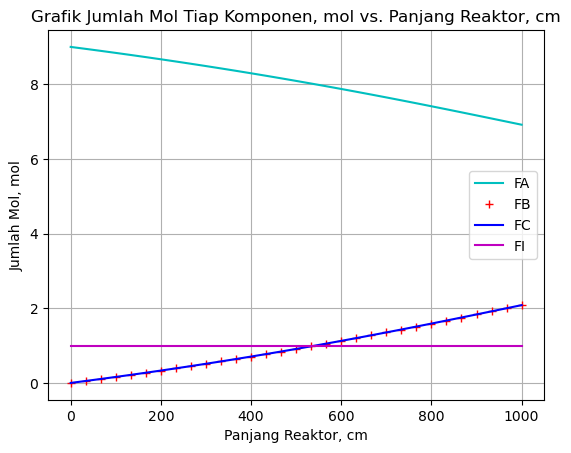

In [33]:
#Tabel 
n = 31 
zspan = np.linspace(0,L,n) 
solver2 = sol(ODE,t_span=[0,L],y0=[x0,T0],t_eval=zspan).y 
xspan = solver2[0] 
Tspan = solver2[1]

Fa = (1-xspan)*F0*0.9 
Fb = xspan*F0*0.9 
Fc = xspan*F0*0.9 
Fi = F0*0.1*np.ones(n) 
Ft = Fa+Fb+Fc+Fi 

header = ['Panjang Reaktor (z), cm','Konversi A (x), %','Suhu (T), K'] 
tabel = np.zeros([len(zspan),3]) 
tabel[:,0] = zspan 
tabel[:,1] = xspan*100 
tabel[:,2] = Tspan 
garis = ('_')*63 
print(garis) 
print('|{:^23s} | {:^17s} | {:^15s} |'.format(*header)) 
print(garis) 
for baris in tabel: 
    print('|{:^23.2f} | {:^17.2f} | {:^15.2f} |'.format(*baris)) 
print(garis)

plt.figure(2) 
plt.plot(zspan,Fa,'c',label='FA') 
plt.plot(zspan,Fb,'r+',label='FB')
plt.plot(zspan,Fc,'b',label='FC') 
plt.plot(zspan,Fi,'m',label='FI') 
plt.legend(loc='center right') 
plt.grid() 
plt.xlabel('Panjang Reaktor, cm') 
plt.ylabel('Jumlah Mol, mol') 
plt.title('Grafik Jumlah Mol Tiap Komponen, mol vs. Panjang Reaktor, cm')

Berdasarkan perhitungan diperoleh distribusi suhu dan konversi A pada reaktor NANI dengan L = 1000 cm seperti yang tertera pada tabel diatas dengan <b>konversi A keluar reaktor sebesar 23.15% dan suhu keluar reaktor sebesar 506.77 K.</b> Dapat disimpulkan juga berdasarkan grafik jumlah mol terhadap panjang reaktor bahwa seiring dengan bertambahnya posisi pada reaktor maka konversi A (reaktan) menjadi B dan C (produk) semakin meningkat dan jumlah mol A pada reaktor semakin menurun bersamaan dengan meningkatnya jumlah mol B dan C. Inert tidak bereaksi dan tidak terjadi pertambahan jumlah mol selama reaksi sehingga jumlah mol inert selama reaksi tetap sama (kurva linier).

Pada umumnya panjang reaktor (L) berpengaruh terhadap laju konversi, sehingga dapat dilakukan perbandingan konversi yang menggunakan reaktor dengan panjang L = 1000 cm dengan konversi yang dihasilkan reaktor dengan panjang L = 4000 cm, sebagai berikut:

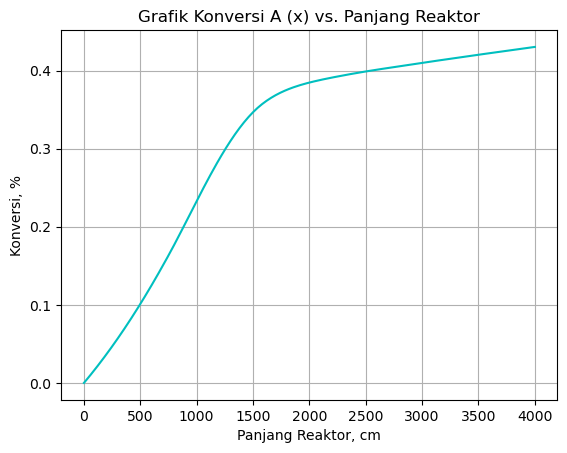

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


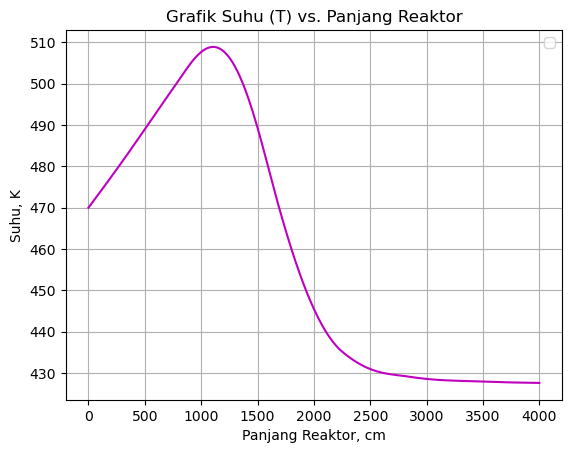

_______________________________________________________________
|Panjang Reaktor (z), cm | Konversi A (x), % |   Suhu (T), K   |
_______________________________________________________________
|         0.00           |       0.00        |     470.00      |
|         80.00          |       1.42        |     472.94      |
|        160.00          |       2.91        |     475.90      |
|        240.00          |       4.47        |     478.90      |
|        320.00          |       6.12        |     481.95      |
|        400.00          |       7.84        |     485.05      |
|        480.00          |       9.65        |     488.20      |
|        560.00          |       11.54       |     491.38      |
|        640.00          |       13.51       |     494.55      |
|        720.00          |       15.55       |     497.68      |
|        800.00          |       17.67       |     500.79      |
|        880.00          |       19.90       |     503.95      |
|        960.00          | 

In [34]:
L2 = 4000
n  = 201
zspan2 =np.linspace(0,L2,n)
zbound2=[0,L2]
solver3=sol(ODE,zbound2,IC,t_eval=zspan2)

#Plot
plt.figure(0)
plt.plot(zspan2,solver3.y[0],'-c')
plt.grid()
plt.title('Grafik Konversi A (x) vs. Panjang Reaktor')
plt.xlabel('Panjang Reaktor, cm')
plt.ylabel('Konversi, %')
plt.show()

plt.figure(1)
plt.plot(zspan2,solver3.y[1],'-m')
plt.grid()
plt.legend()
plt.title('Grafik Suhu (T) vs. Panjang Reaktor')
plt.xlabel('Panjang Reaktor, cm')
plt.ylabel('Suhu, K')
plt.show()

#Tabel 
n = 51 
zspan = np.linspace(0,L2,n) 
solver4 = sol(ODE,t_span=[0,L2],y0=[x0,T0],t_eval=zspan).y 
xspan = solver4[0] 
Tspan = solver4[1]

Fa = (1-xspan)*F0*0.9 
Fb = xspan*F0*0.9 
Fc = xspan*F0*0.9 
Fi = F0*0.1*np.ones(n) 
Ft = Fa+Fb+Fc+Fi 

header = ['Panjang Reaktor (z), cm','Konversi A (x), %','Suhu (T), K'] 
tabel = np.zeros([len(zspan),3]) 
tabel[:,0] = zspan 
tabel[:,1] = xspan*100 
tabel[:,2] = Tspan 
garis = ('_')*63 
print(garis) 
print('|{:^23s} | {:^17s} | {:^15s} |'.format(*header)) 
print(garis) 
for baris in tabel: 
    print('|{:^23.2f} | {:^17.2f} | {:^15.2f} |'.format(*baris)) 
print(garis)

##Kesimpulan

Berdasarkan variasi percobaan diperoleh bahwa reaktor dengan panjang 4 m pada mulanya memiliki profil konversi A yang mirip dengan reaktor dengan panjang 1 m. Akan tetapi, dapat dilihat pada <b>posisi 1120 m</b> dari titik z = 0 suhu mencapai titik tertinggi sebesar <b>508.89 K (titik hotspot)</b> sebelum perlahan mulai menurun. Pada posisi tersebut dapat dilihat juga bahwa laju konversi A semakin menurun walaupun masih terjadi konversi A menjadi produk. Adanya penurunan suhu menyebabkan konversi A setelah posisi 1120 m menjadi tidak signifikan, sehingga panas yang dihasilkan dari reaksi eksotermis menurun dan suhu keluar reaktor menjadi lebih rendah yaitu sebesar <b>427.62 K (seperti pada tabel).</b> Walaupun begitu, penambahan panjang reaktor dapat digunakan untuk optimasi konversi A menjadi produk. Pada panjang reaktor 4 m persen <b>konversi A keluar reaktor menjadi 43.04 %.</b>   